<a href="https://colab.research.google.com/github/sweeeet-zoo/sparta5/blob/main/%ED%86%B5%EA%B3%84%ED%95%99_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 문제 1번

In [ ]:
# 문제 1번: 변동계수 구하기
# 변동계수(cv) = 표준편차 / 평균

import numpy as np
com_a = [76300, 77400, 77900, 77200, 76900, 78800]
com_b = [6400, 7000, 7400, 6900, 7300, 7600]

# 배열 생성
a_array = np.array(com_a)
b_array = np.array(com_b)

# 표준편차 구하기
a_std = np.std(a_array)
b_std = np.std(b_array)

# 평균 구하기
a_mean = np.mean(a_array)
b_mean = np.mean(b_array)

# 변동계수 구하기
cv_a_np = a_std/a_mean
cv_b_np = b_std/b_mean

# 결과 출력
print(f'A회사의 변동계수 {cv_a_np:.3f}')
print(f'B회사의 변동계수 {cv_b_np:.3f}')

A회사의 변동계수 0.010
B회사의 변동계수 0.055


In [ ]:
# 모범 답안

import numpy as np
com_a = [76300, 77400, 77900, 77200, 76900, 78800]
com_b = [6400, 7000, 7400, 6900, 7300, 7600]

# 배열 생성
a_array = np.array(com_a)
b_array = np.array(com_b)

# 표준편차 구하기
# 표본의 표준편차이므로, ddof = 1
a_std = np.std(a_array, ddof=1)
b_std = np.std(b_array, ddof=1)

# 평균 구하기
a_mean = np.mean(a_array)
b_mean = np.mean(b_array)

# 변동계수 구하기
cv_a_np = a_std/a_mean
cv_b_np = b_std/b_mean

# 결과 출력
print(f'A회사의 변동계수 {cv_a_np:.3f}')
print(f'B회사의 변동계수 {cv_b_np:.3f}')

A회사의 변동계수 0.011
B회사의 변동계수 0.060


In [ ]:
# pandas로 풀이할 시 표준편차 디폴트 값이 ddof=1 이다.
import pandas as pd

### 문제 2번

평균이 $\mu$ 이고 표준편차가 $\sigma = 8$ 인 정규분포를 따르는 모집단에서 크기가 25인 표본을 추출하여 평균을 계산하였더니 $\bar{x}$가 42.7 이다. 이때 $\mu$에 대한 95% 신뢰 구간을 구하라.

μ에 대한 95% 신뢰 구간 => μ이 포함되었을 것으로 예상되는 범위

In [ ]:
import scipy.stats as stats
import numpy as np

# 주어진 값들
sigma = 8  # 모집단의 표준편차
n = 25  # 표본 크기
x_bar = 42.7  # 표본 평균
confidence_level = 0.95  # 신뢰 수준

# 신뢰구간 구하기
# 표본 표준오차(scale) = 표본표준편차/sqrt(표본크기)
CI = stats.t.interval(0.95, df=n-1, loc=x_bar, scale=sigma/np.sqrt(n))
lower_bound = CI[0]
upper_bound = CI[1]

# 결과 출력
print(f"95% 신뢰 구간: ({lower_bound:.2f}, {upper_bound:.2f})")

95% 신뢰 구간: (39.40, 46.00)


In [ ]:
# 모범 답안
# Z 분포를 이용한 모평균을 95% 신뢰 구간으로 구하는 공식
# sigma/(n**0.5) = 표준오차
# 모표준편차가 주어질 경우, z 검정 진행할 것!

import scipy.stats as stats
import numpy as np

# 주어진 값들
sigma = 8  # 모집단의 표준편차
n = 25  # 표본 크기
x_bar = 42.7  # 표본 평균
confidence_level = 0.95  # 신뢰 수준

# 표준오차 구하기
se = sigma/np.sqrt(n)
lower_bound = x_bar - 1.96 * se
upper_bound = x_bar + 1.96 * se
print(f'95% 신뢰구간 : ({lower_bound:.3f}, {upper_bound: .3f})')

95% 신뢰구간 : (39.564,  45.836)


### 문제 3번

In [ ]:
import numpy as np
from scipy import stats

nature = [44, 44, 56, 46, 47, 38, 58, 53, 49, 35, 46, 30, 31]  # 자연적으로 말린 목초
artificial = [35, 47, 55, 29, 40, 39, 32, 41, 42, 57, 51, 39]  # 인공적으로 말린 목초

# 귀무가설: nature < artificial
# 대립가설: nature > artificial
print("H0: 귀무가설은 젖소의 우유생산량이 nature < artificial 이다.")
print("H1: 대립가설은 젖소의 우유생산량이 nature > artificial 이다.")

# 배열 생성
group_a = np.array(nature)
group_b = np.array(artificial)

# 독립 이표본 t-테스트 수행
t_stat, p_value = stats.ttest_ind(group_a, group_b, alternative='greater')
print(f"t-통계량: {t_stat:.4f}")
print(f"p-값: {p_value:.4f}")

# 결과 출력
alpha = 0.05
if p_value < alpha:
    print("귀무가설을 기각합니다.")
else:
    print("귀무가설을 기각하지 않습니다.")

H0: 귀무가설은 젖소의 우유생산량이 nature < artificial 이다.
H1: 대립가설은 젖소의 우유생산량이 nature > artificial 이다.
t-통계량: 0.6056
p-값: 0.2754
귀무가설을 기각하지 않습니다.


In [ ]:
# 모범 답안
import numpy as np
from scipy import stats

nature = [44, 44, 56, 46, 47, 38, 58, 53, 49, 35, 46, 30, 31]  # 자연적으로 말린 목초
artificial = [35, 47, 55, 29, 40, 39, 32, 41, 42, 57, 51, 39]  # 인공적으로 말린 목초

# 귀무가설: 두 젖소의 우유 생산량은 똑같다.
# 대립가설: 자연적으로 말린 목초를 먹은 젖소의 우유생산량이 더 많다.

stats.ttest_ind(nature, artificial, alternative='greater', equal_var=True)

TtestResult(statistic=0.605564440457578, pvalue=0.2753667443616386, df=23.0)

In [ ]:
# 정규성 검정
for data in [nature, artificial]:
    stat, pvalue = stats.shapiro(data)
    print(stat, pvalue)

0.9525647224349689 0.6376096941881872
0.9537352910187997 0.6920588812255069


In [ ]:
# 등분산성 검정
stats.levene(nature, artificial)

LeveneResult(statistic=0.0022673818681084607, pvalue=0.9624325198350847)

### 문제 4번

In [ ]:
import pandas as pd
from scipy import stats
# URL 로 데이터 가져오기
url = "https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/master/data/click_rates.csv"
click_rate  = pd.read_csv(url)
clicks = click_rate.pivot(index='Click', columns='Headline', values='Rate')
display(clicks)

# 카이제곱 독립성 검정 통계량 p-value, 자유도, 기댓값을 계산
chi2_stat, p_val, dof, expected = stats.chi2_contingency(clicks, correction=True) # correction=True -> 자유도가 1일 때 수치를 보정해주는 옵션/ 일반적으로 2x2일 때 적용 (Yates' correction을 적용)

# 결과 출력
print("H0: 귀무가설은 헤드라인과 페이지 클릭률은 독립적이다는 것이다.")
print("H1: 대립가설은 헤드라인과 페이지 클릭률은 독립적이지 않다는 것이다.")
print(f"chisq: {chi2_stat:.3f}") #1.666
print(f"pvalue: {p_val:.3f}") #0.435

# 결론
alpha = 0.05  # 유의수준
if p_val < alpha: # 오타 나있었다ㅜㅜ
    print("귀무가설 기각: 헤드라인과 페이지 클릭율에는 관련이 있다.")
else:
    print("귀무가설 채택: 헤드라인과 페이지 클릭율에는 관련이 없다.")

Headline,Headline A,Headline B,Headline C
Click,,,
Click,14,8,12
No-click,986,992,988


H0: 귀무가설은 헤드라인과 페이지 클릭률은 독립적이다는 것이다.
H1: 대립가설은 헤드라인과 페이지 클릭률은 독립적이지 않다는 것이다.
chisq: 1.666
pvalue: 0.435
귀무가설 채택: 헤드라인과 페이지 클릭율에는 관련이 없다.


In [ ]:
# 모범 답안
import pandas as pd
from scipy import stats
# URL 로 데이터 가져오기
url = "https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/master/data/click_rates.csv"
click_rate  = pd.read_csv(url)
clicks = click_rate.pivot(index='Click', columns='Headline', values='Rate')

chi2_stat, p_val, dof, expected = stats.chi2_contingency(clicks)

print(f"chisq: {chi2_stat:.3f}") #1.666
print(f"pvalue: {p_val:.3f}") #0.435

# 결론
alpha = 0.05  # 유의수준
if p_val < alpha:
    print("귀무가설 기각: 헤드라인과 페이지 클릭율에는 관련이 있다.")
else:
    print("귀무가설 채택: 헤드라인과 페이지 클릭율에는 관련이 없다.")

chisq: 1.666
pvalue: 0.435
귀무가설 채택: 헤드라인과 페이지 클릭율에는 관련이 없다.


### 문제 5번

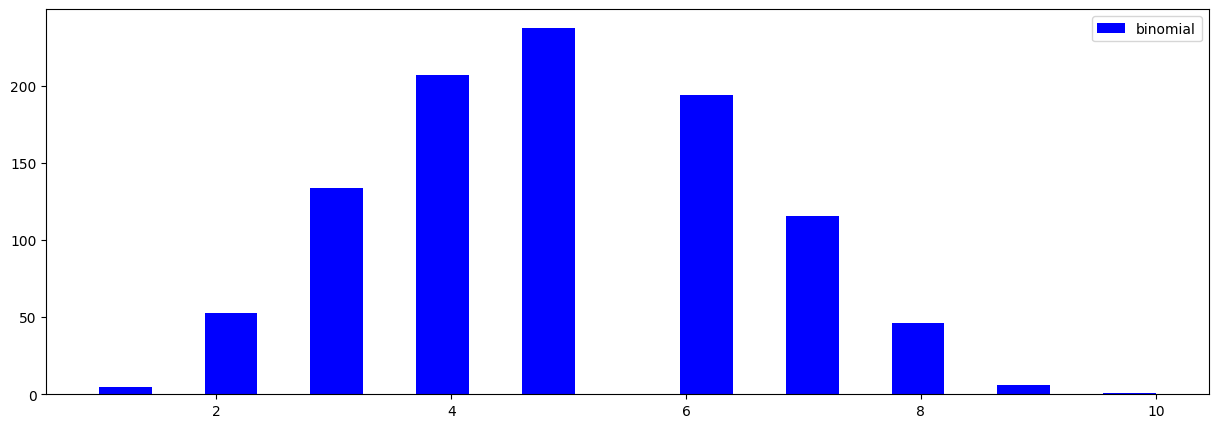

In [ ]:
import pandas as pd
import numpy as np

np.random.seed(42)

# scipy를 통한 샘플 생성
# 01. 이항 분포 샘플 생성: 확률(p) 0.5 / 시행(n) 10번 / 개수(k) 1000개
from scipy.stats import binom
n = 10
p = 0.5

binomial_size = 1000

binomial_data = binom.rvs(n, p, size=binomial_size)

#시각화: 히스토그램 동시에 표현 / bins = 20
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

plt.hist(binomial_data, color = 'blue', bins=20, label='binomial')
plt.legend()
plt.show()


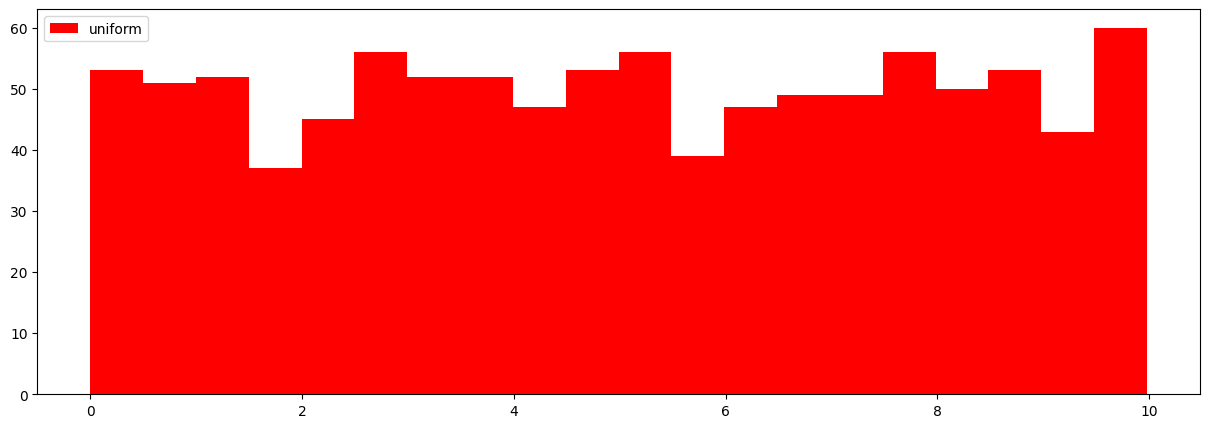

In [ ]:
# 02. 균등 분포 샘플 생성: 시작 0 / 끝 10 / 표본 1000
from scipy.stats import uniform

uniform_data = uniform.rvs(size=1000, loc=0, scale=10)

#시각화: 히스토그램 동시에 표현 / bins = 20
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
plt.hist(uniform_data, color='red', bins=20, label='uniform')
plt.legend()
plt.show()

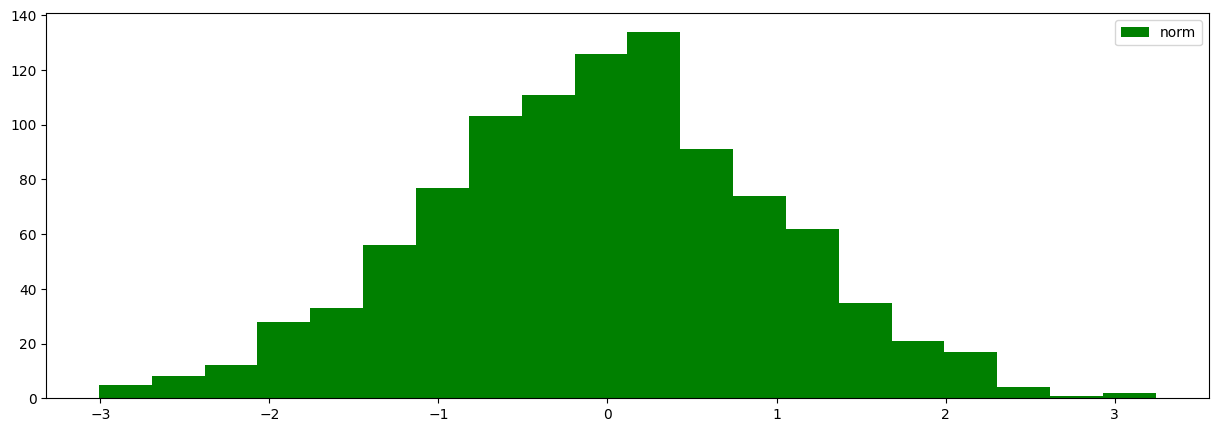

In [ ]:
# 03. 표준 정규 분포 샘플 생성: 표본 1000
from scipy.stats import norm

normal_data = stats.norm.rvs(size=1000)

#시각화: 히스토그램 동시에 표현 / bins = 20
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
plt.hist(normal_data, color='green', bins=20, label='norm')
plt.legend()
plt.show()

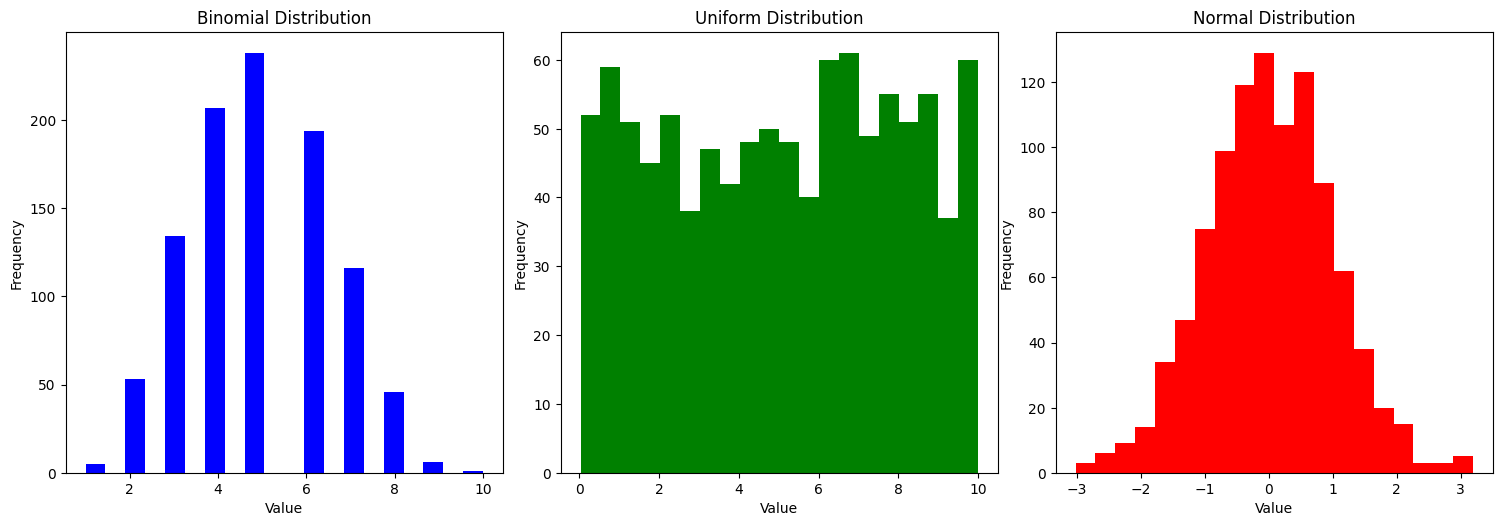

In [ ]:
# 결합 코드
import pandas as pd
import numpy as np

np.random.seed(42)

# scipy를 통한 샘플 생성
# 01. 이항 분포 샘플 생성: 확률(p) 0.5 / 시행(n) 10번 / 개수(k) 1000개
from scipy.stats import binom
n = 10
p = 0.5
binomial_size = 1000
binomial_data = binom.rvs(n, p, size=binomial_size)

# 02. 균등 분포 샘플 생성: 시작 0 / 끝 10 / 표본 1000
from scipy.stats import uniform
uniform_data = uniform.rvs(size=1000, loc=0, scale=10)

# 03. 표준 정규 분포 샘플 생성: 표본 1000
from scipy.stats import norm
normal_data = norm.rvs(size=1000)

#시각화: 히스토그램 동시에 표현 / bins = 20
import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))
plt.tight_layout()

ax1.hist(binomial_data, color = 'blue', bins=20, label='binomial')
ax1.set_title('Binomial Distribution')
ax1.set_xlabel("Value")
ax1.set_ylabel("Frequency")

ax2.hist(uniform_data, color='green', bins=20, label='uniform')
ax2.set_title('Uniform Distribution')
ax2.set_xlabel("Value")
ax2.set_ylabel("Frequency")

ax3.hist(normal_data, color='red', bins=20, label='norm')
ax3.set_title('Normal Distribution')
ax3.set_xlabel("Value")
ax3.set_ylabel("Frequency")

plt.show()

(array([  3.,   6.,   9.,  14.,  34.,  47.,  75.,  99., 119., 129., 107.,
        123.,  89.,  62.,  38.,  20.,  15.,   3.,   3.,   5.]),
 array([-3.01951216, -2.70888117, -2.39825018, -2.0876192 , -1.77698821,
        -1.46635722, -1.15572624, -0.84509525, -0.53446427, -0.22383328,
         0.08679771,  0.39742869,  0.70805968,  1.01869066,  1.32932165,
         1.63995264,  1.95058362,  2.26121461,  2.5718456 ,  2.88247658,
         3.19310757]),
 <BarContainer object of 20 artists>)

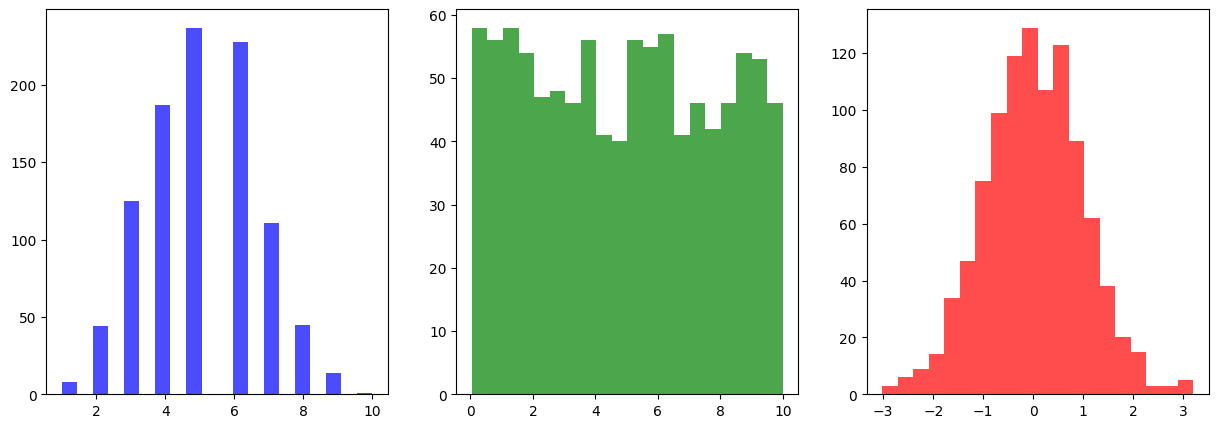

In [ ]:
# 모범 답안
# 중심극한 정리를 이해하고 있는가 -> 시뮬레이션 기능을 할 수 있는가 -> 시각화 할 수 있는가
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import *       # * = stats에 있는 모든 라이브러리를 불러온다

np.random.seed(42) # 랜덤한 값을 고정해주기
sample_size = 1000

# Uniform
uniform_data = uniform.rvs(loc=0, scale=10, size=sample_size)

# biomial
binomial_data = binom.rvs(n=10, p=0.5, size=sample_size)

# normal
normal_data = norm.rvs(size=sample_size) # 기본값 loc=0, scale=1 생략

# subplots 시각화
plt.figure(figsize=(15,5))

plt.subplot(1, 3, 1) #1행, 3열의 표를 만들고 그 중 1번에 그리겠다는 의미
plt.hist(binomial_data, bins=20, color='blue', alpha=0.7)

plt.subplot(1, 3, 2) #1행, 3열의 표를 만들고 그 중 1번에 그리겠다는 의미
plt.hist(uniform_data, bins=20, color='green', alpha=0.7)

plt.subplot(1, 3, 3) #1행, 3열의 표를 만들고 그 중 1번에 그리겠다는 의미
plt.hist(normal_data, bins=20, color='red', alpha=0.7)

### 문제 6번

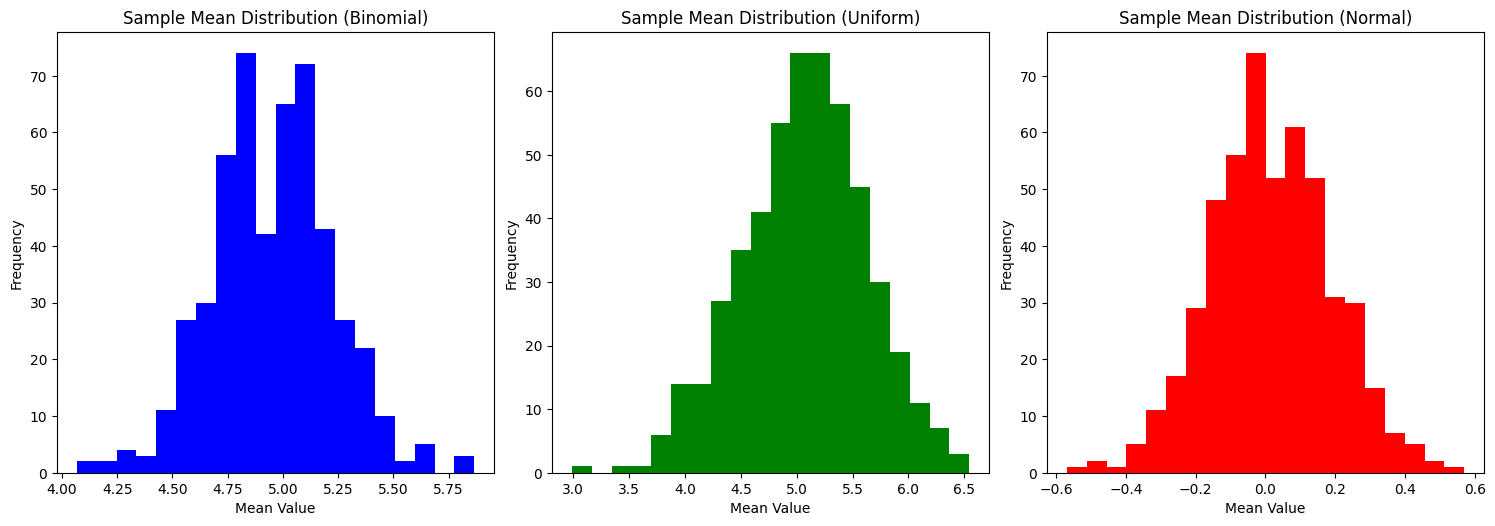

In [ ]:
num_samples = 500
sample_means = {
    "Binomial": [],
    "Uniform": [],
    "Normal": []
}

# Binomial 30개씩 500번 복원 추출 평균 내기
for i in range(num_samples):
    bin_sample = np.random.choice(binomial_data,size=30, replace=True)
    bin_m = np.mean(bin_sample)
    sample_means['Binomial'].append(bin_m)

# Uniform 30개씩 500번 복원 추출 평균 내기
for i in range(num_samples):
    uni_sample = np.random.choice(uniform_data,size=30, replace=True)
    uni_m = np.mean(uni_sample)
    sample_means['Uniform'].append(uni_m)

# Normal 30개씩 500번 복원 추출 평균 내기
for i in range(num_samples):
    nor_sample = np.random.choice(normal_data,size=30, replace=True)
    nor_m = np.mean(nor_sample)
    sample_means['Normal'].append(nor_m)

#시각화
import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))
plt.tight_layout()

ax1.hist(sample_means['Binomial'], color = 'blue', bins=20)
ax1.set_title('Sample Mean Distribution (Binomial)')
ax1.set_xlabel("Mean Value")
ax1.set_ylabel("Frequency")

ax2.hist(sample_means['Uniform'], color='green', bins=20)
ax2.set_title('Sample Mean Distribution (Uniform)')
ax2.set_xlabel("Mean Value")
ax2.set_ylabel("Frequency")

ax3.hist(sample_means['Normal'], color='red', bins=20)
ax3.set_title('Sample Mean Distribution (Normal)')
ax3.set_xlabel("Mean Value")
ax3.set_ylabel("Frequency")

plt.show()

In [ ]:
'''
# 임의 표본 추출
binomial_m = np.random.choice(binomial_data, size=30, replace=True).mean()
binomial_sample = np.random()
sample_means["Binomial"].append(binomial_m)
'''
print(sample_means['Binomial'])
print(sample_means['Uniform'])
print(sample_means['Normal'])

print(len(sample_means['Binomial']))
print(len(sample_means['Uniform']))
print(len(sample_means['Normal']))

(array([ 2.,  5.,  1.,  5., 10., 19., 30., 43., 45., 48., 54., 50., 47.,
        41., 35., 24., 19., 15.,  4.,  3.]),
 array([-0.53516857, -0.48512524, -0.43508191, -0.38503858, -0.33499524,
        -0.28495191, -0.23490858, -0.18486525, -0.13482191, -0.08477858,
        -0.03473525,  0.01530809,  0.06535142,  0.11539475,  0.16543808,
         0.21548142,  0.26552475,  0.31556808,  0.36561141,  0.41565475,
         0.46569808]),
 <BarContainer object of 20 artists>)

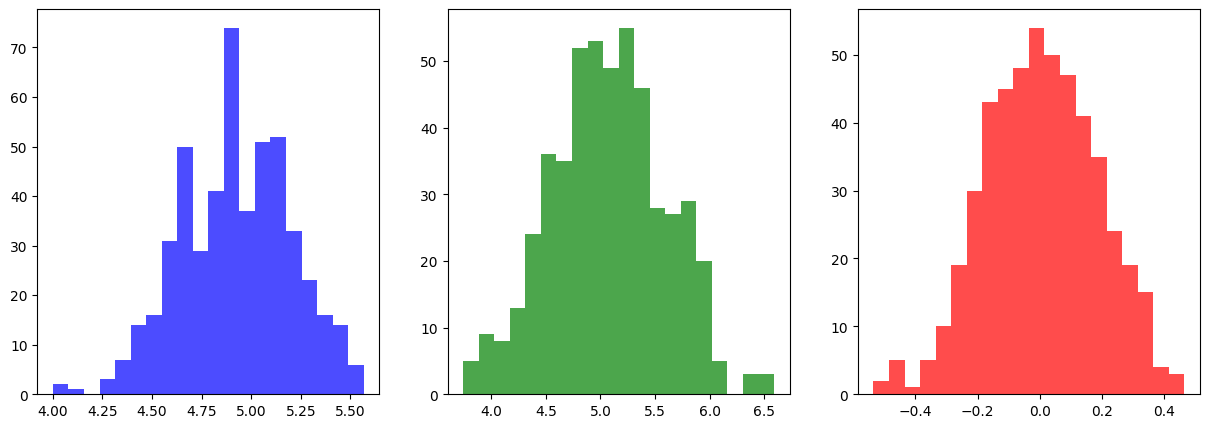

In [ ]:
# 모범 답안
# boots

num_sample = 500
sample_means = {
    'Binomial' : [],
    'Uniform' : [],
    'Normal' : []
}

# 복원추출 구현하기 + 500 번 반복
# Binomial
for _ in range(num_sample):
    binomial_mean = np.random.choice(binomial_data, size = 30, replace=True).mean()
    sample_means['Binomial'].append(binomial_mean)
sample_means['Binomial'][:10]

# Uniform
for _ in range(num_sample):
    uniform_mean = np.random.choice(uniform_data, size = 30, replace=True).mean()
    sample_means['Uniform'].append(uniform_mean)
sample_means['Uniform'][:10]

# Uniform
for _ in range(num_sample):
    norm_mean = np.random.choice(normal_data, size = 30, replace=True).mean()
    sample_means['Normal'].append(norm_mean)
sample_means['Normal'][:10]

# subplots 시각화
plt.figure(figsize=(15,5))

plt.subplot(1, 3, 1) #1행, 3열의 표를 만들고 그 중 1번에 그리겠다는 의미
plt.hist(sample_means['Binomial'], bins=20, color='blue', alpha=0.7)

plt.subplot(1, 3, 2) #1행, 3열의 표를 만들고 그 중 1번에 그리겠다는 의미
plt.hist(sample_means['Uniform'], bins=20, color='green', alpha=0.7)

plt.subplot(1, 3, 3) #1행, 3열의 표를 만들고 그 중 1번에 그리겠다는 의미
plt.hist(sample_means['Normal'], bins=20, color='red', alpha=0.7)